In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import pde_solver as pde
import pickle
import os

# Square layout, 2-component R-D system with fixed stoich

A reaction-diffusion model is a mathematical model which calculates the concentration of two substances at a given time based on the substances'

- diffusion
- feed rate (how fast the substances are being created by the reaction OR a source)
- removal rate (how fast the substances are being used up by the reaction OR a sink)
- type of reaction between the two

For the reaction $u + 2v \rightarrow 3v$ (i.e. two of species V come together to convert a single U into V) this is governed by the differential equations

\begin{equation}
\frac{\partial u}{\partial t} = r_u \nabla^2 u - uv^2 + f(1-u)
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} = r_v \nabla^2 v + uv^2 - (f+k)v
\end{equation}

Where $u$ and $v$ are the concentrations of the two reactants, f is the rate at which reactant u is fed into the system (by an outside source), k is the rate at which reactant v is removed from the system (by an outside sink), and $r_u$ and $r_v$ are the diffusion rates of $u$ and $v$ respectively.

The system after a finite time step $dt$ is therefore:

\begin{equation}
u_2 = u_1 + [r_u \nabla^2 u - uv^2 + f(1-u)]dt
\end{equation}

\begin{equation}
v_2 = v_1 + [r_v \nabla^2 v + uv^2 - (f+k)v]dt.
\end{equation}

In [2]:
inp = pde.initialframe((100, 100))

In [3]:
# first need to define a laplacian kernel - we're going to do the laplacian by just convolving the whole arrays with
# this kernel. keep values flexible so we can play with them later. start with a 3x3

lap = np.array([[0.05, 0.2, 0.05],
                [0.2, -1, 0.2],
                [0.05, 0.2, 0.05]]) # values suggested by https://www.karlsims.com/rd.html

# define reaction and diffustion rate constants (these also need to be adjustable)
ru = 1.0
rv = 0.5
f = 0.0367
k = 0.0649

# time step (also a user input)
dt = 1.0

In [4]:
%%time

out = pde.evolve(inp, ru, rv, f, k)

CPU times: user 12.7 s, sys: 2.13 s, total: 14.9 s
Wall time: 14.9 s


<IPython.core.display.Javascript object>


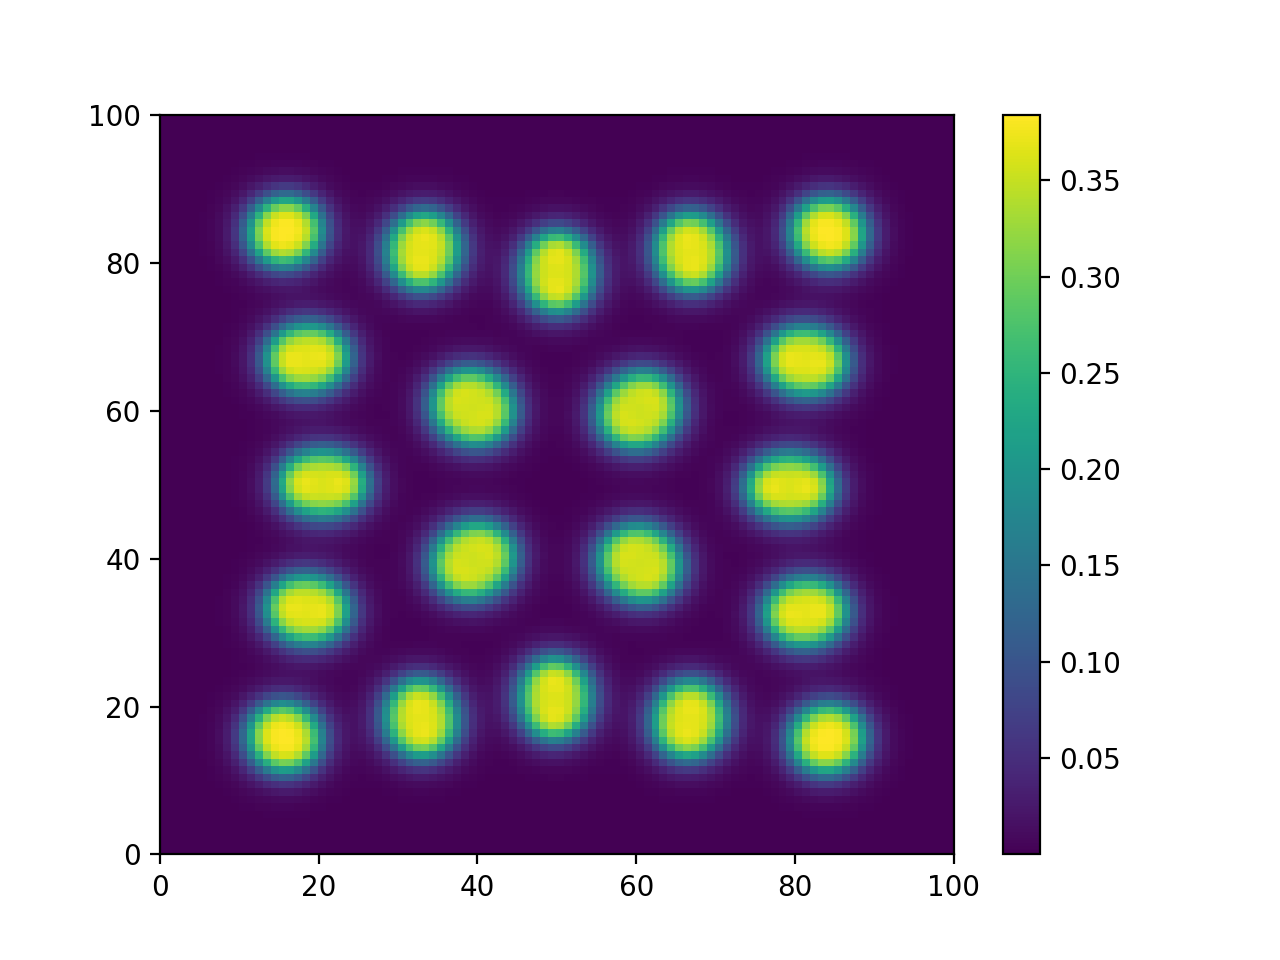

In [6]:
%matplotlib notebook

im = plt.pcolormesh(out[:,:,400,1])
plt.colorbar(im)

In [15]:
with open('testdata/x100_y100_t5000_ru1_rv05_f_0367_k0649_periodic.pkl', 'wb') as file:
    pickle.dump(test, file)

In [8]:
del(out)